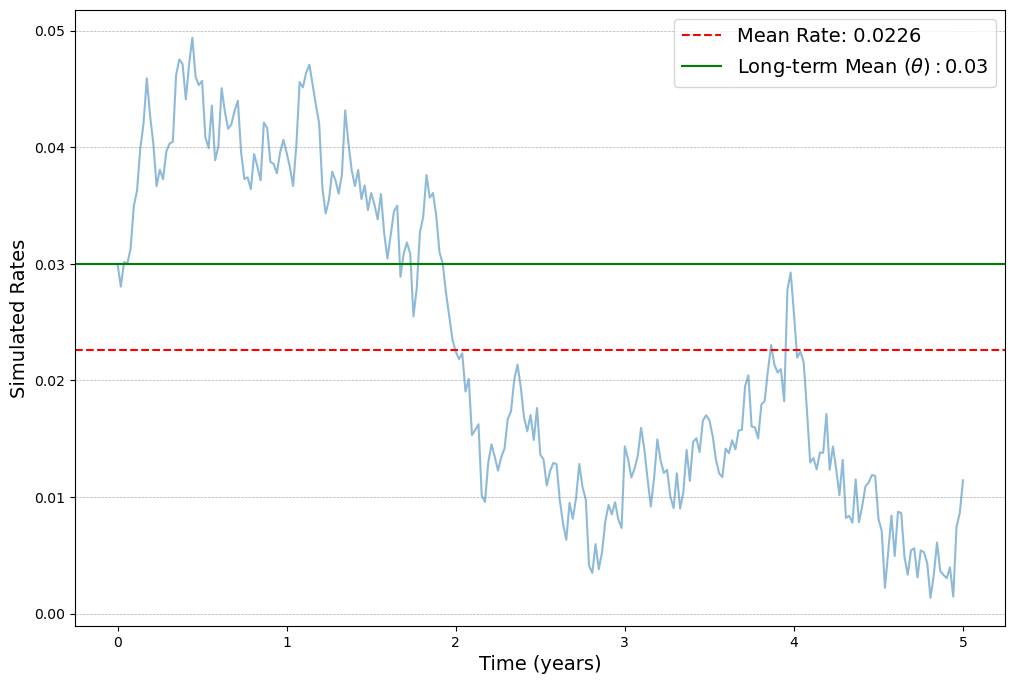

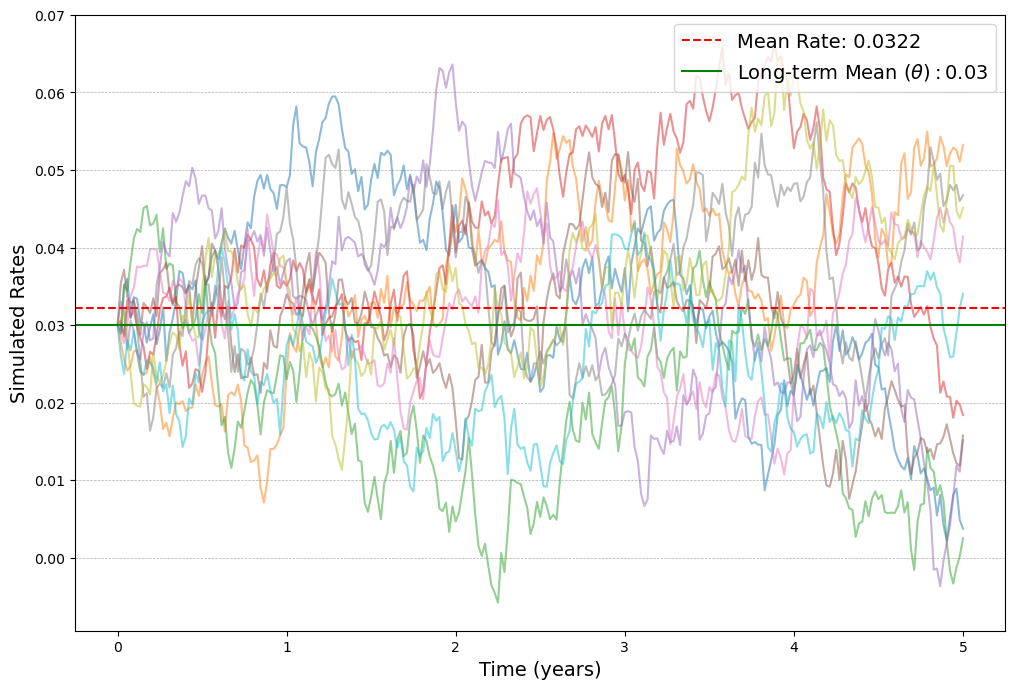

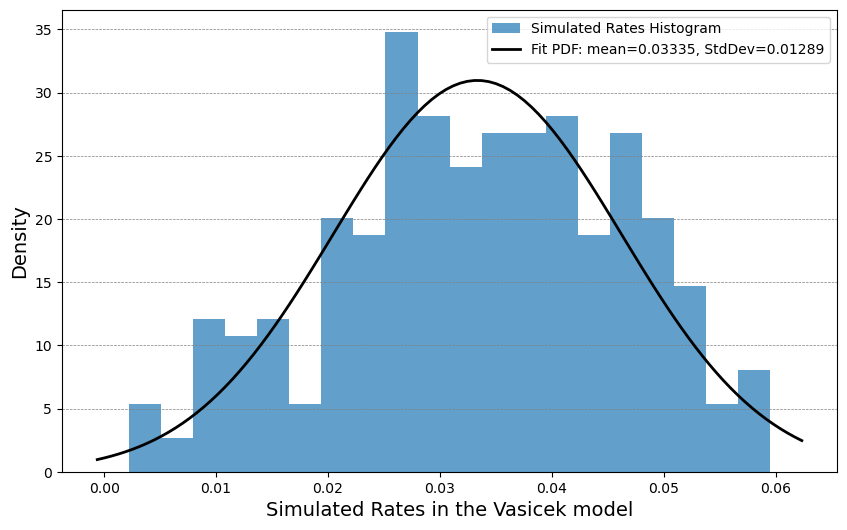

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from typing import Union

np.random.seed(13)

def calculate_zero_coupon_price(time_to_maturity: Union[float, np.ndarray],
                                initial_short_rate: float,
                                kappa: float,
                                theta: float,
                                beta: float):
    y_infty = theta * beta / kappa - beta**2 / (2 * kappa**2)
    b = 1 / kappa * (1 - np.exp(-kappa * time_to_maturity))
    a = y_infty * (time_to_maturity - b) + beta**2 / (4 * kappa) * b**2
    return np.exp(-a - b * initial_short_rate)

def simulate_vasicek(initial_short_rate: float, kappa: float, theta: float,
                     beta: float, horizon: float, dt: float = 1.0/12, num_sim: int = 10000):
    std_rates = np.sqrt(beta**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * dt)))
    num_periods = int(horizon / dt)
    short_rates = np.empty((num_sim, num_periods + 1))
    short_rates[:, 0] = initial_short_rate
    error_terms = np.random.normal(scale=std_rates, size=(num_sim, num_periods))
    for i in range(1, num_periods + 1):
        short_rates[:, i] = (theta + (short_rates[:, i - 1] - theta) * np.exp(-kappa * dt) +
                             error_terms[:, i - 1])
    return short_rates

def plot_simulation(time_points, rates, theta, plot_path, num_sim=1):
    """Plot simulated rates using the Vasicek Model and save the plot to a file."""
    plt.figure(figsize=(12, 8))
    mean_rates = np.mean(rates, axis=1)
    for i in range(num_sim):
        plt.plot(time_points, rates[i, :], alpha=0.5)
    plt.axhline(y=np.mean(mean_rates), color='r', linestyle='--', label=f"Mean Rate: {np.mean(mean_rates):.4f}")
    plt.axhline(y=theta, color='g', linestyle='-', label=f"Long-term Mean $(\\theta): {theta:.2f}$")
    plt.xlabel('Time (years)', fontsize=14)
    plt.ylabel('Simulated Rates',fontsize=14)
    #plt.title('Simulated Rates using the Vasicek Model')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.legend(loc='upper right',fontsize=14)
    plt.savefig(plot_path)  
    plt.show()
    plt.close()


short_rate = 0.03
theta = 0.03
kappa = 1.0
beta = 0.02
dt = 1/52
time_points = np.arange(0, 5.01, dt)


# Simulate rates 1
plot_path ="/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/VasicekModelPlot.png"
short_rates_1 = simulate_vasicek(short_rate, kappa, theta, beta, horizon=5, dt=dt, num_sim=1)
plot_simulation(time_points, short_rates_1, theta, plot_path, num_sim=1)

# Simulate rates 10
plot_path ="/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/VasicekModelPlotSIM.png"
short_rates_10 = simulate_vasicek(short_rate, kappa, theta, beta, horizon=5, dt=dt, num_sim=10)
plot_simulation(time_points, short_rates_10, theta, plot_path, num_sim=10)

mu, std = norm.fit(short_rates_10[0, :])
plt.figure(figsize=(10, 6))
plt.hist(short_rates_10[0, :], bins=20, density=True, color='tab:blue', alpha=0.7, label='Simulated Rates Histogram')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Fit PDF: mean={mu:.5f}, StdDev={std:.5f}')
plt.xlabel('Simulated Rates in the Vasicek model', fontsize=14)
plt.ylabel('Density', fontsize=14)
#plt.title('Simulated Rates Histogram and Fitted Normal Distribution')
plt.legend(loc = 'upper right',fontsize=10)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/NormalDistributionPlot.png")  
plt.show()
plt.close()
